In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_features_train = pd.read_csv('./data/dengue_features_train.csv')
print('Infromaion about the features_train \n', df_features_train.info(verbose=True, show_counts=True))
df_features_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [4]:
df_labels_train = pd.read_csv('./data/dengue_labels_train.csv')
print('Infromaion about the labels_train \n', df_labels_train.info(verbose=True, show_counts=True))
df_labels_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB
Infromaion about the labels_train 
 None


city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [5]:
df_features_test = pd.read_csv('./data/dengue_features_test.csv')
print('Infromaion about the features_test \n', df_features_test.info(verbose=True, show_counts=True))
df_features_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.091200                 78.60             298.492857  ...   
1  0.072314                 12.56             298.475714  ...   
2  0.091529                  3.66             299.455714  ...   
3  0.125686                  0.00             299.690000  ...   
4  0.075914                  0.76             299.780000  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1  

[5 rows x 24 columns]

---

## Data Analysis - Total_cases

Analysis the distribution of the labels

In [6]:
df_train_with_label = pd.concat([df_features_train, df_labels_train.loc[:,'total_cases']], axis=1)

### Analysis Data with All Rows

In [7]:
df_train_with_label['week_start_date']=pd.to_datetime(df_train_with_label['week_start_date'])

In [8]:
df_train_with_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

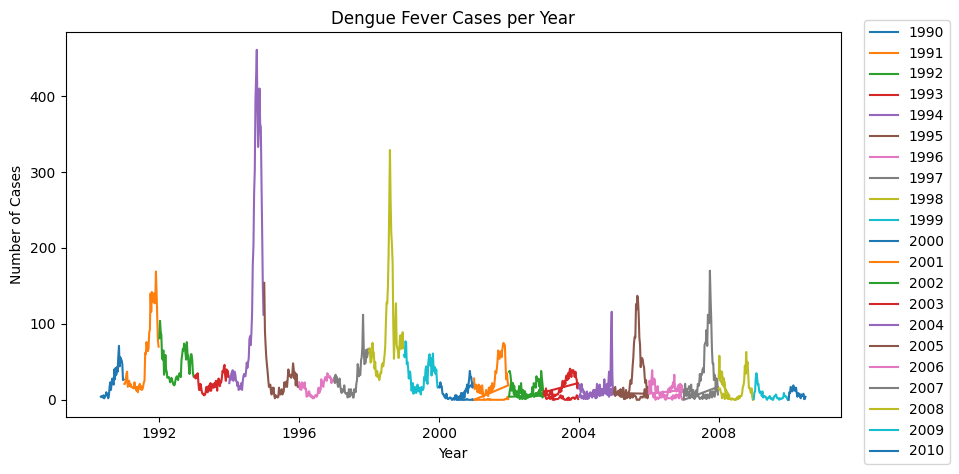

In [9]:
fig,ax = plt.subplots(figsize=(10,5))
for i in np.unique(df_train_with_label['year']):
    ax.plot(df_train_with_label[df_train_with_label['week_start_date'].dt.year==i].week_start_date, 
      df_train_with_label[df_train_with_label['week_start_date'].dt.year==i].total_cases, label='%d'%(i))
    ax.legend()

ax.set_title('Dengue Fever Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cases')
ax.legend(bbox_to_anchor=(1.15, 1.05))
#plt.savefig('dengue.png')


> **Note:** The labels are overlapped, therefore we split the citys

In [10]:
print(df_features_train['city'].value_counts())
sj_train_with_label = df_train_with_label[df_train_with_label['city']=='sj']
iq_train_with_label = df_train_with_label[df_train_with_label['city']=='iq']

sj    936
iq    520
Name: city, dtype: int64


Text(0.5, 0.98, 'DENGUE ACTUAL CASES')

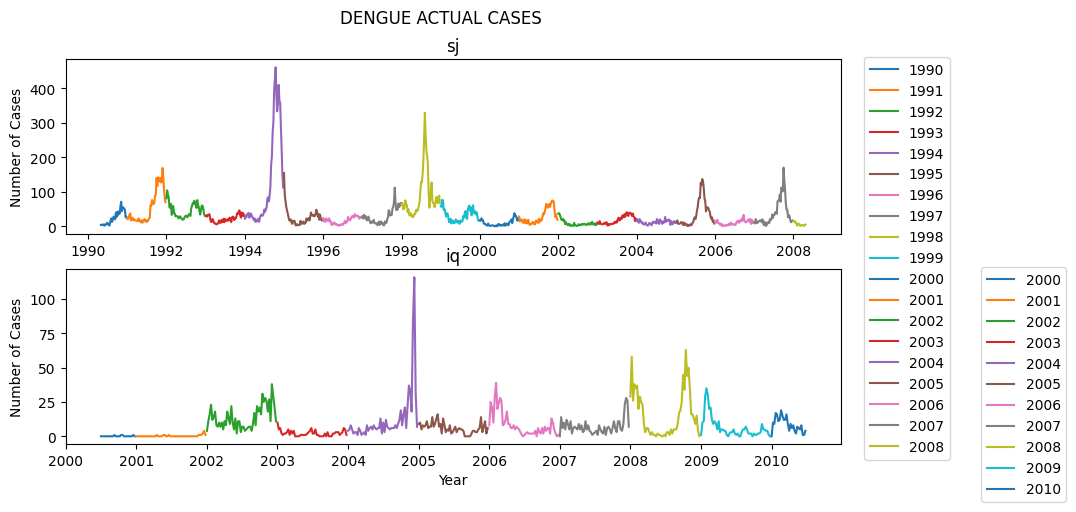

In [11]:
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, figsize=(10,5))
for i in np.unique(sj_train_with_label['year']):
    ax1.plot(sj_train_with_label[sj_train_with_label['week_start_date'].dt.year==i].week_start_date, 
      sj_train_with_label[sj_train_with_label['week_start_date'].dt.year==i].total_cases, label='%d'%(i))
    ax1.legend()
ax1.set_title('sj')
ax1.set_ylabel('Number of Cases')
ax1.legend(bbox_to_anchor=(1.15, 1.05))

for i in np.unique(iq_train_with_label['year']):
    ax2.plot(iq_train_with_label[iq_train_with_label['week_start_date'].dt.year==i].week_start_date, 
      iq_train_with_label[iq_train_with_label['week_start_date'].dt.year==i].total_cases, label='%d'%(i))
    ax2.legend()
ax2.set_title('iq')
ax2.set_ylabel('Number of Cases')
ax2.set_xlabel('Year')
ax2.legend(bbox_to_anchor=(1.3, 1.05))

plt.suptitle("DENGUE ACTUAL CASES")

### Test and Train Data Analysis by Year

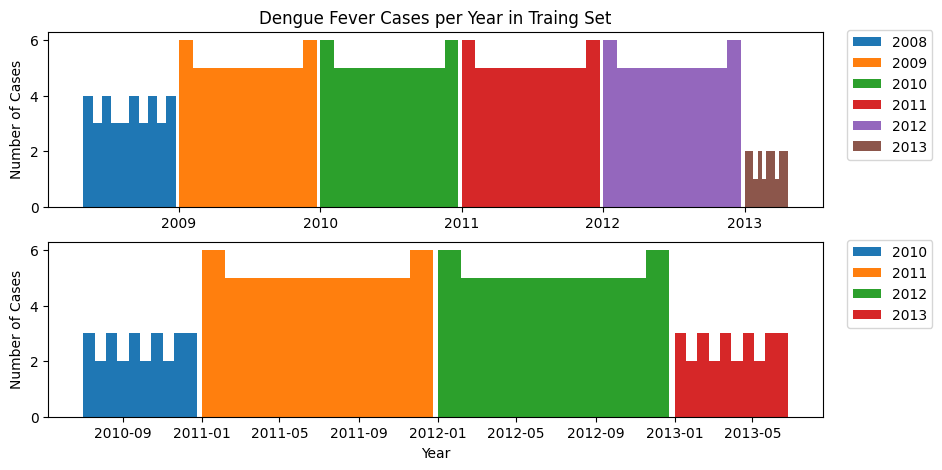

In [12]:
df_features_test['week_start_date']=pd.to_datetime(df_features_test['week_start_date'])
sj_features_test = df_features_test[df_features_test['city']=='sj']
iq_features_test = df_features_test[df_features_test['city']=='iq']
fig, (ax1, ax2)= plt.subplots(2, 1, figsize=(10,5))
for i in np.unique(sj_features_test['year']):
    ax1.hist(sj_features_test[sj_features_test['week_start_date'].dt.year==i].week_start_date, label='%d'%(i))
    ax1.legend()
ax1.set_title('Dengue Fever Cases per Year in Traing Set')
ax1.set_ylabel('Number of Cases')
ax1.legend(bbox_to_anchor=(1.15, 1.05))

for i in np.unique(iq_features_test['year']):
    ax2.hist(iq_features_test[iq_features_test['week_start_date'].dt.year==i].week_start_date, label='%d'%(i))
    ax2.legend()
ax2.set_ylabel('Number of Cases')
ax2.set_xlabel('Year')
ax2.legend(bbox_to_anchor=(1.15, 1.05))

In [13]:
# pv = pd.pivot_table(df_train_with_label, index=df_train_with_label.year, columns=df_train_with_label.city,
#                     values='total_cases', aggfunc='sum')
# pv.plot()
# plt.ylabel('Yearly total cases')

Text(0.5, 0, 'Year')

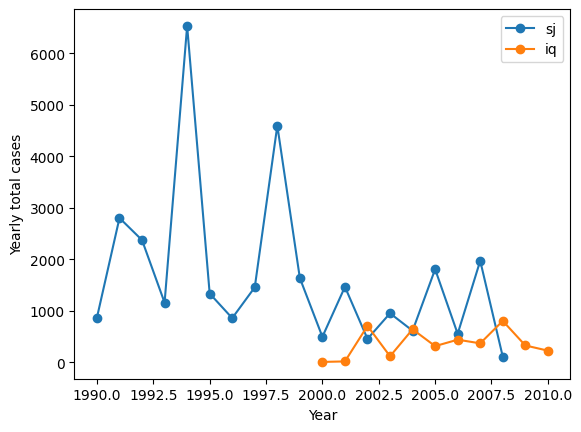

In [14]:
plt.plot(sj_train_with_label.groupby(['year'])['total_cases'].sum(), '-o', label='sj')
plt.plot(iq_train_with_label.groupby(['year'])['total_cases'].sum(), '-o', label='iq')
plt.legend()
plt.ylabel('Yearly total cases')
plt.xlabel('Year')

Text(83.34722222222221, 0.5, 'Yearly total cases')

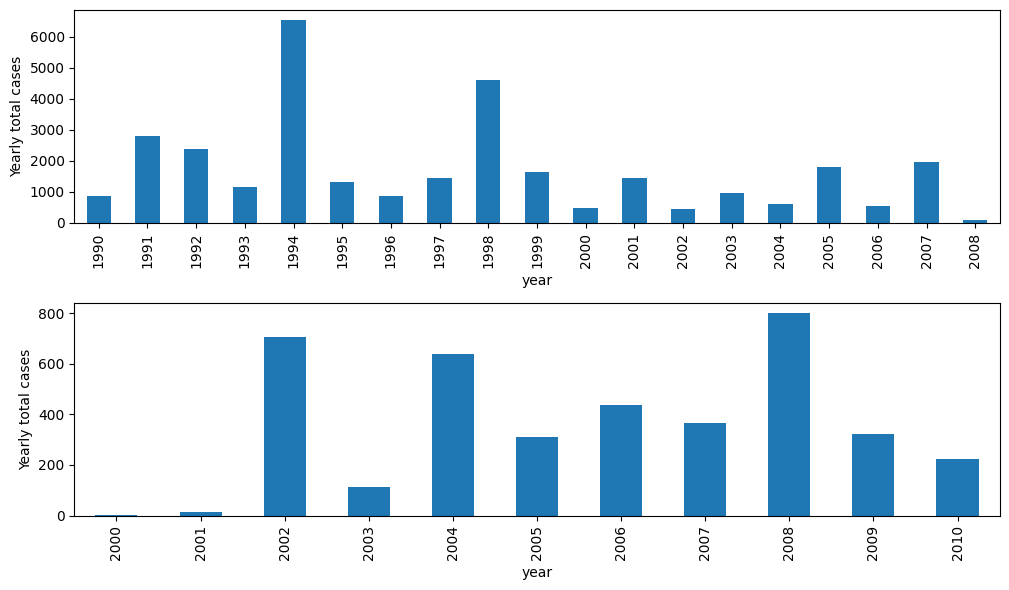

In [15]:
fig2, axes= plt.subplots(nrows=2, ncols=1, figsize=(10,6))
sj_train_with_label.groupby(['year']).total_cases.sum().plot(kind='bar', ax=axes[0])
iq_train_with_label.groupby(['year']).total_cases.sum().plot(kind='bar', ax=axes[1])
fig2.tight_layout()
axes[0].set_ylabel('Yearly total cases')
axes[1].set_ylabel('Yearly total cases')

### Test and Train Data Analysis by Month

Text(0.5, 0, 'Year')

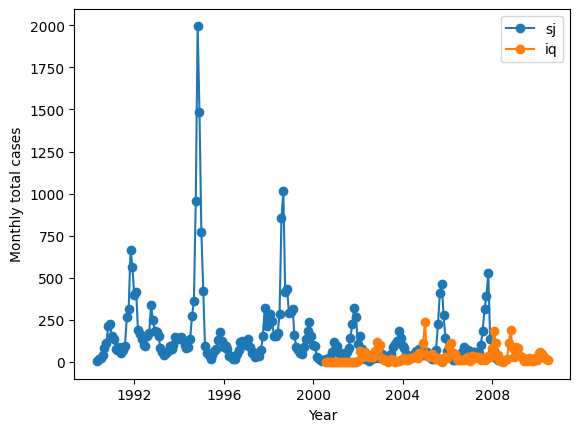

In [16]:
plt.plot(sj_train_with_label.groupby(pd.Grouper(key='week_start_date',freq="M"))['total_cases'].sum(), '-o', label='sj')
plt.plot(iq_train_with_label.groupby(pd.Grouper(key='week_start_date', freq="M"))['total_cases'].sum(), '-o', label='iq')
plt.legend()
plt.ylabel('Monthly total cases')
plt.xlabel('Year')

In [17]:
pv3 = pd.pivot_table(sj_train_with_label, index=pd.DatetimeIndex(sj_train_with_label['week_start_date']).month, 
                     columns=sj_train_with_label['year'], values='total_cases', aggfunc='sum')

pv4 = pd.pivot_table(iq_train_with_label, index=pd.DatetimeIndex(iq_train_with_label['week_start_date']).month, 
                     columns=iq_train_with_label['year'], values='total_cases', aggfunc='sum')

Text(0, 0.5, 'Monthly total cases')

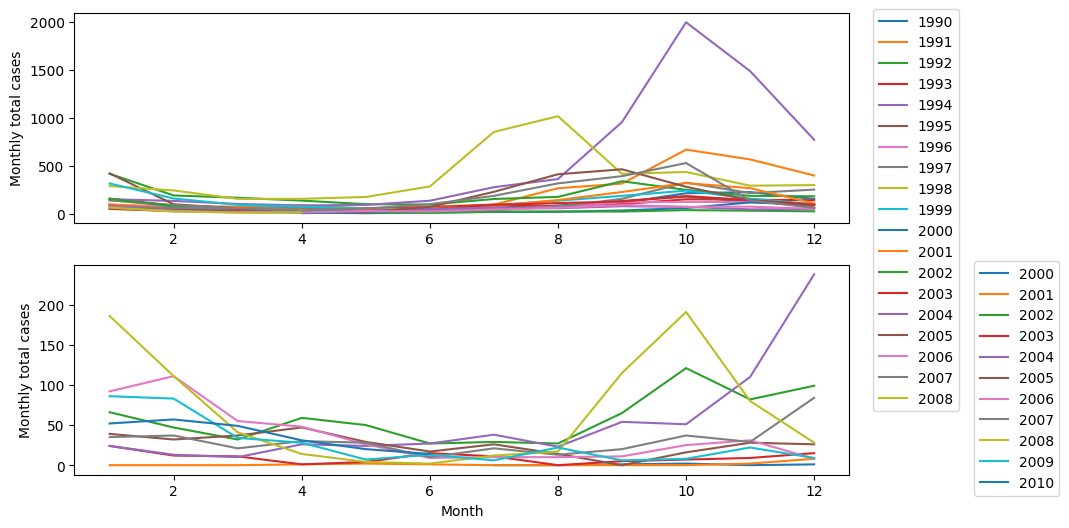

In [18]:
fig3, axes= plt.subplots(nrows=2, ncols=1, figsize=(10,6))
pv3.plot(ax=axes[0])
pv4.plot(ax=axes[1])
axes[0].legend(bbox_to_anchor=(1.15, 1.05))
axes[1].legend(bbox_to_anchor=(1.28, 1.05))
axes[0].set(xlabel=None)
axes[1].set_xlabel('Month')
axes[0].set_ylabel('Monthly total cases')
axes[1].set_ylabel('Monthly total cases')
# fig3.tight_layout()

Year 1994 in sj is an extrem case.

Year 2004 in iq is an extrem case.

---

## Feature Analysis

### Outlier Analysis

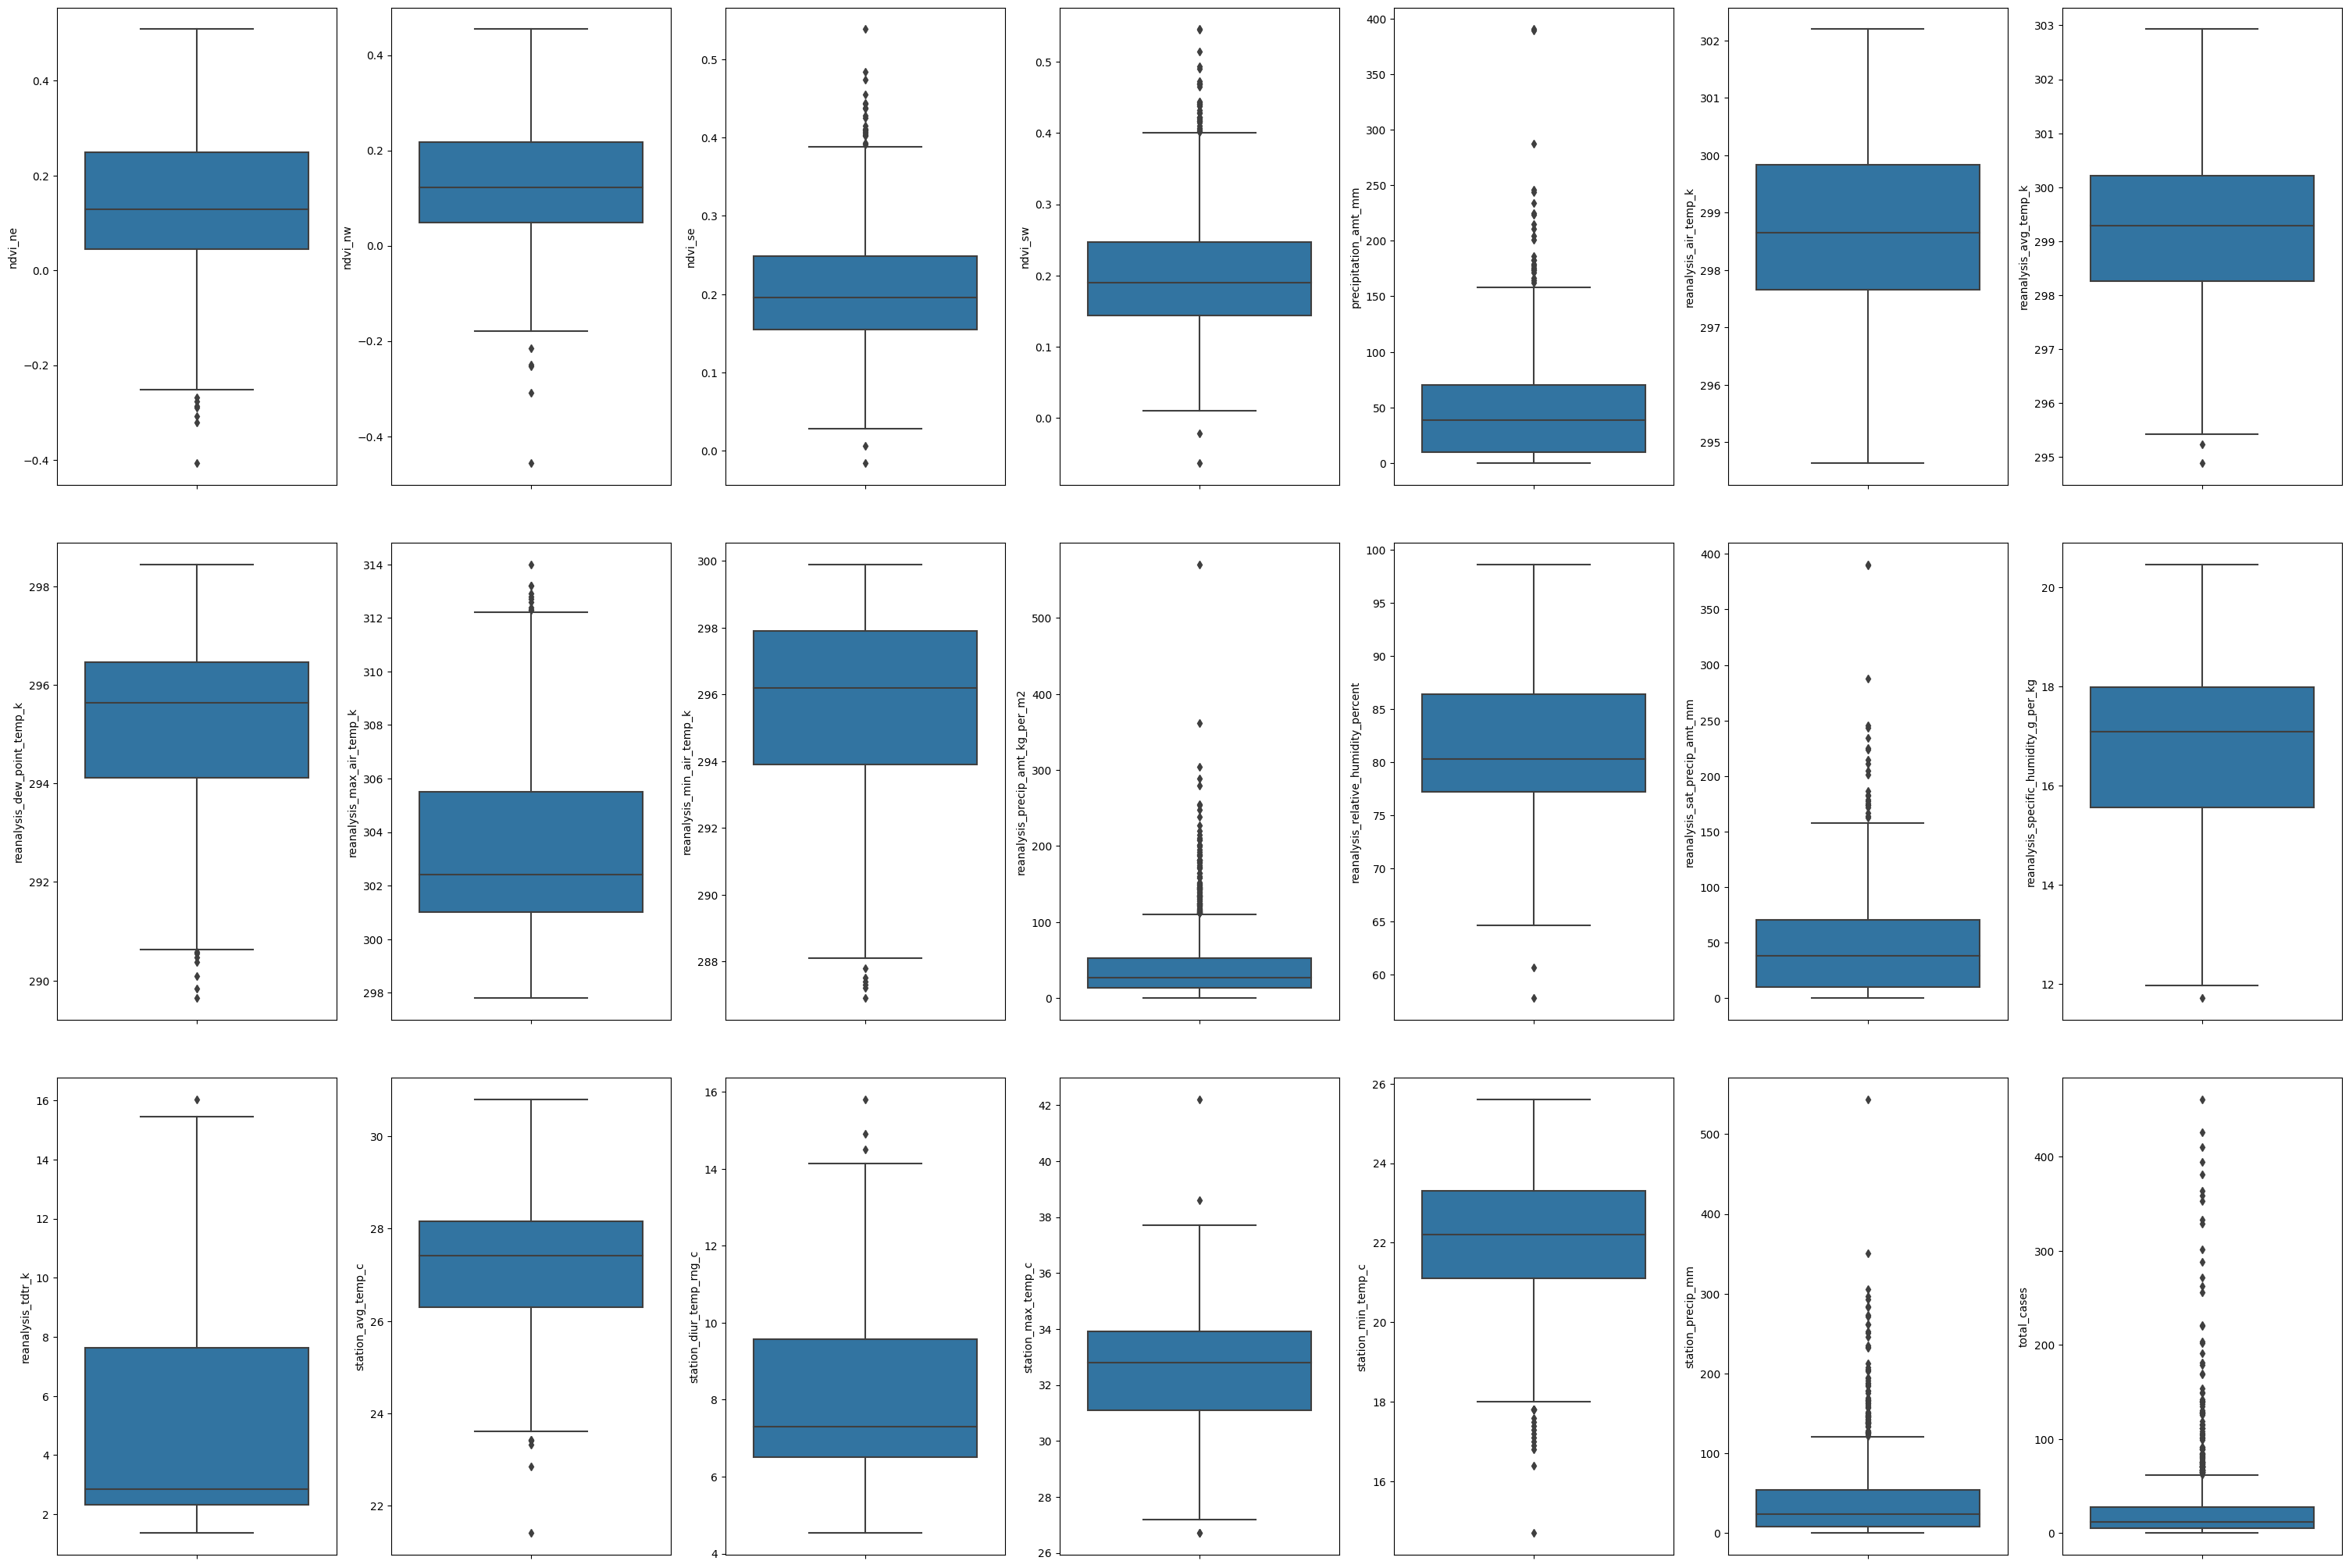

In [39]:
df_train_numeric = df_train_with_label.drop(columns=['city','year', 'weekofyear', 'week_start_date'])

fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in df_train_numeric.items():
    # sns.boxplot(y=k, data=nba_data, ax=axs[index])
    sns.boxplot(y=k, data=df_train_numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

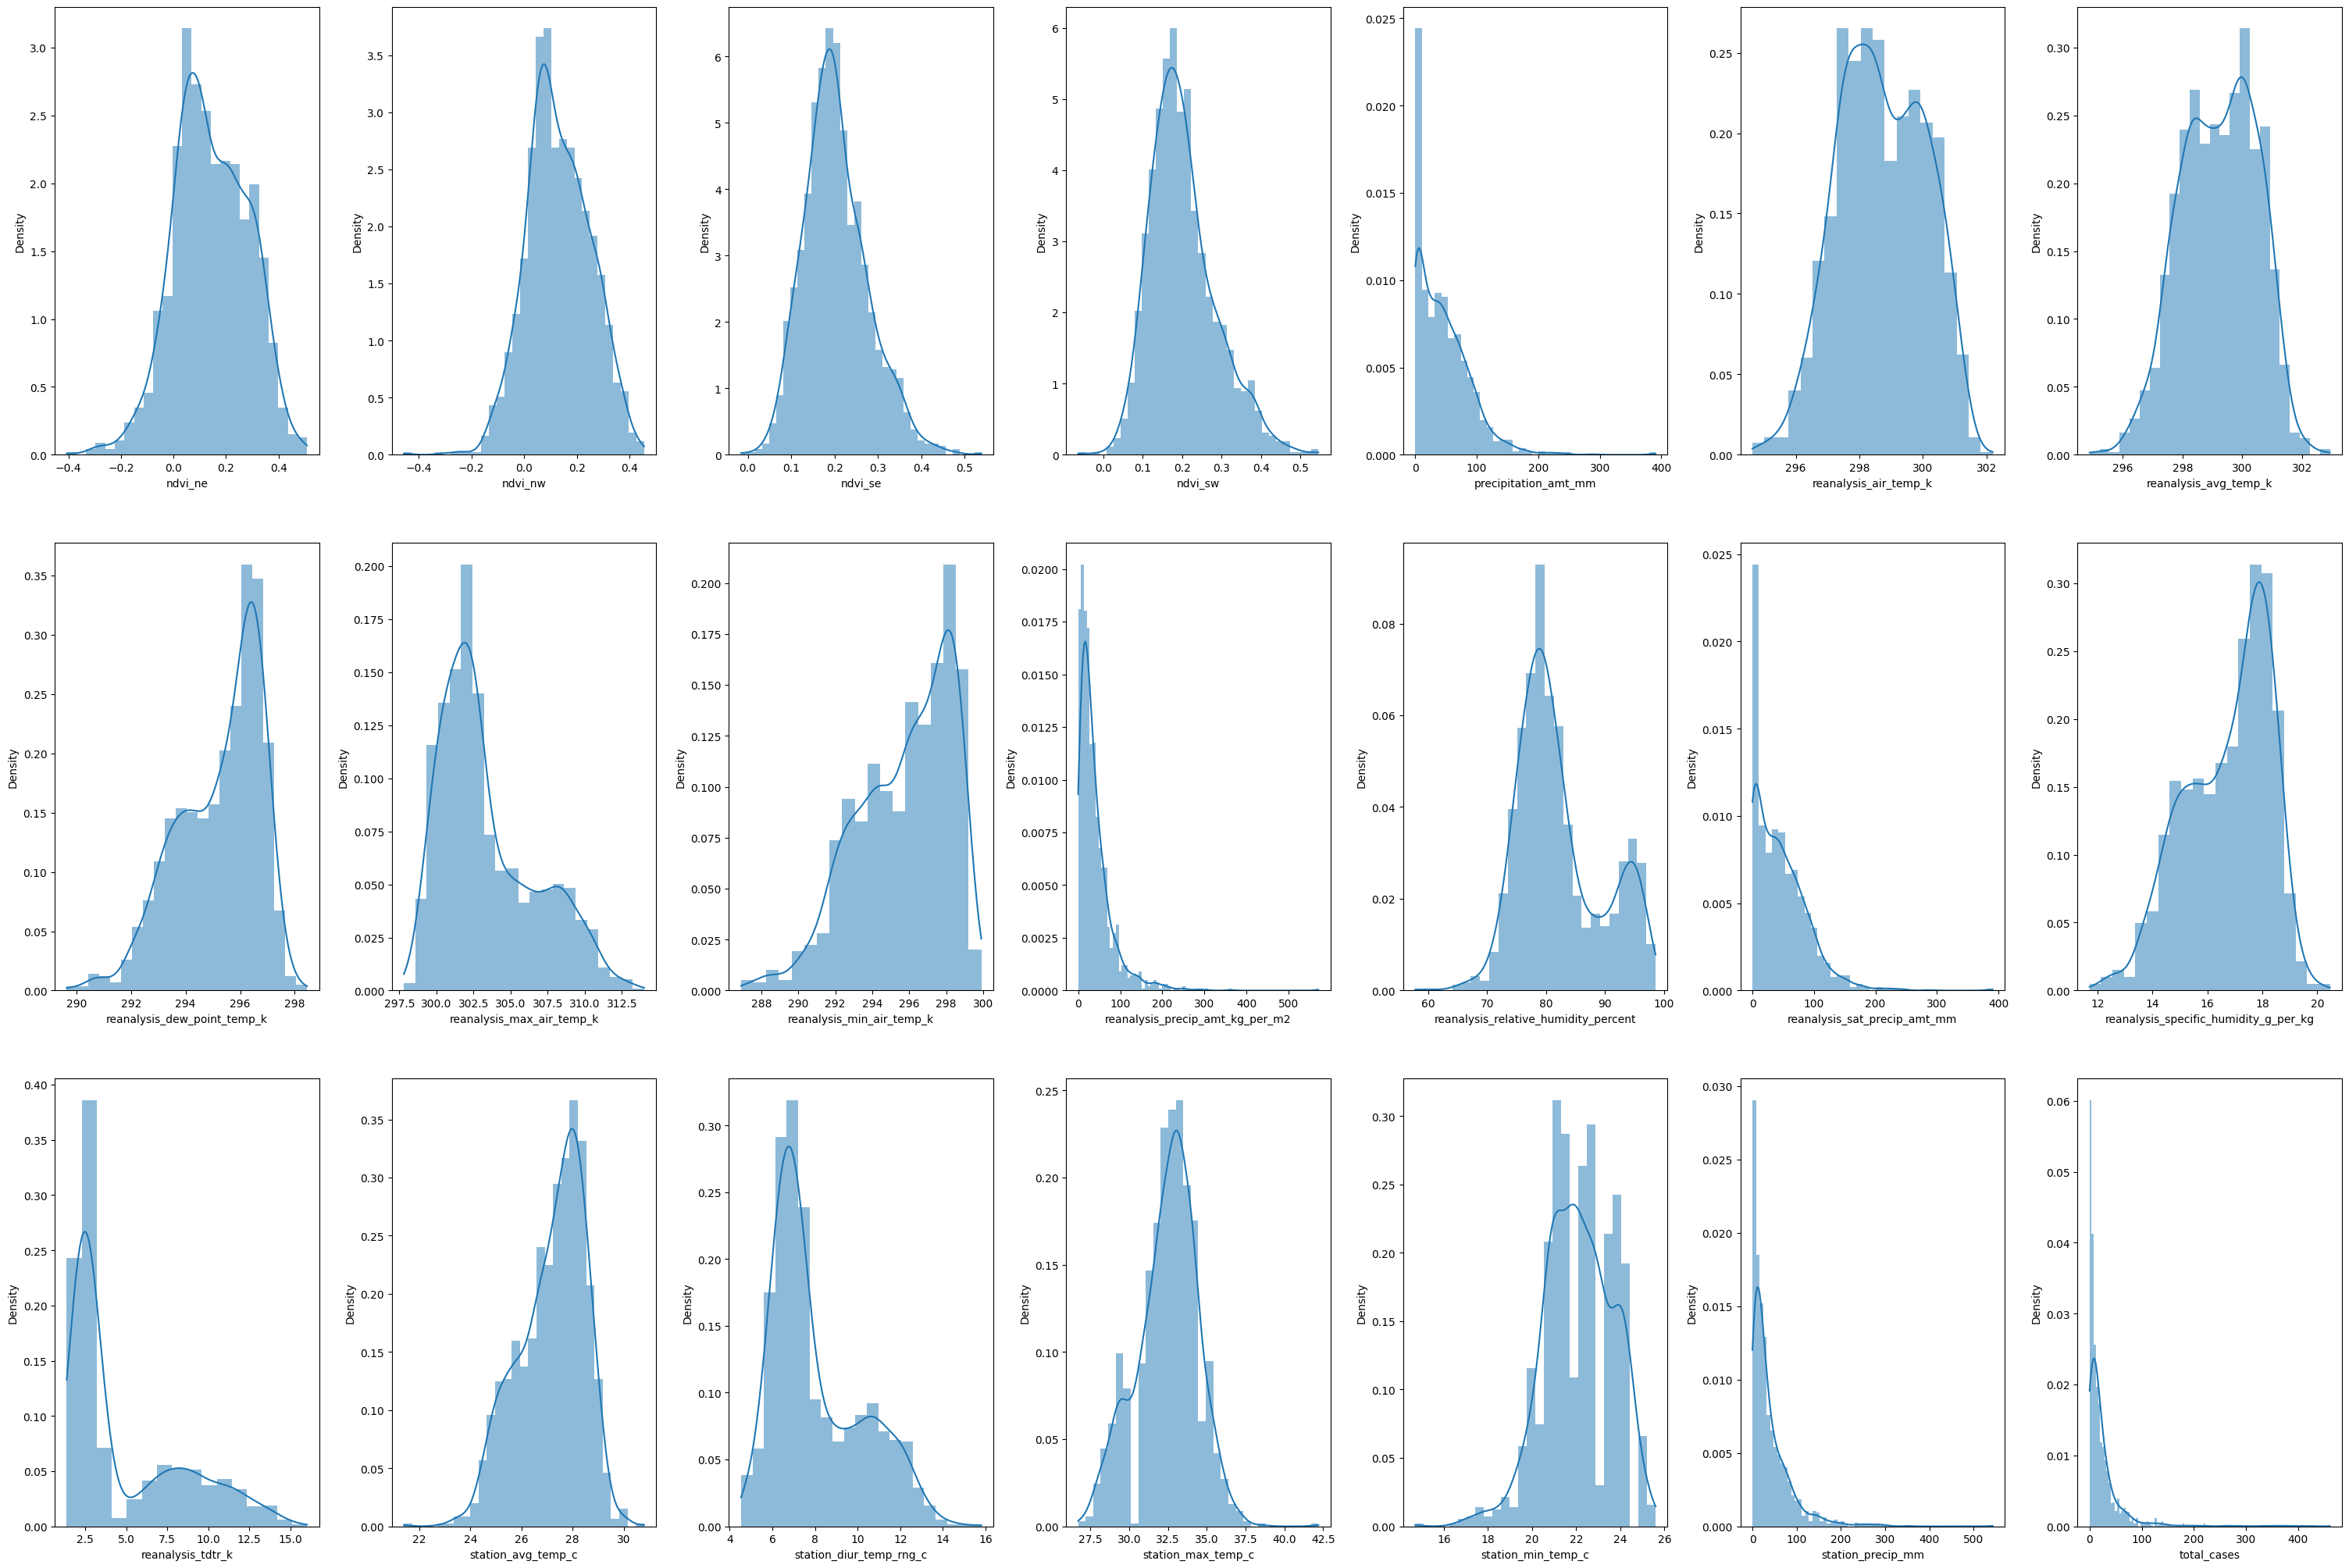

In [41]:
# We can use histogram plots to analyze how values are distributed into discrete bins
# If you want to predict a label based on features both should have similar histogram plots
# Data with a normal distribution (data is symmetric about the mean) is the easiest to work with
# because it doesn't have as many outliers
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in df_train_numeric.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Correlation Analysis

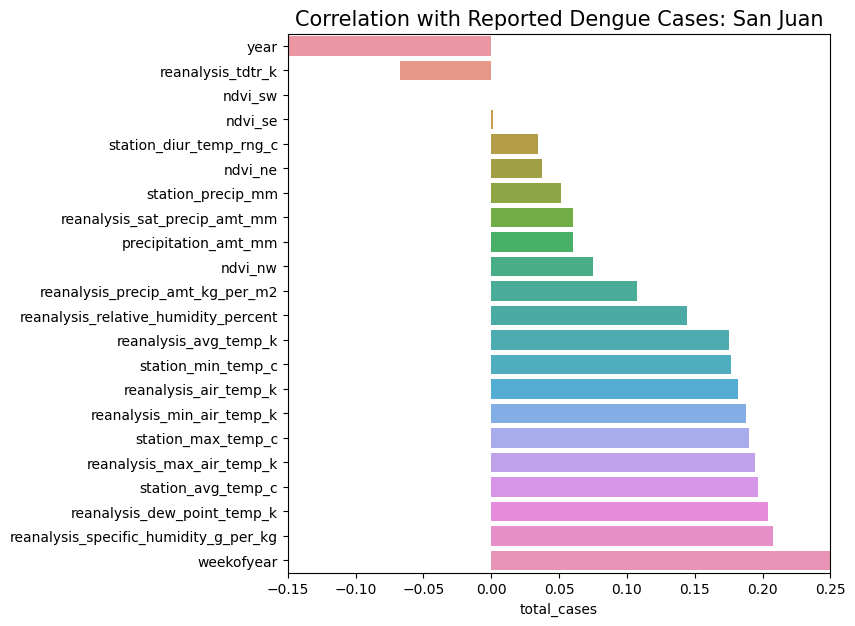

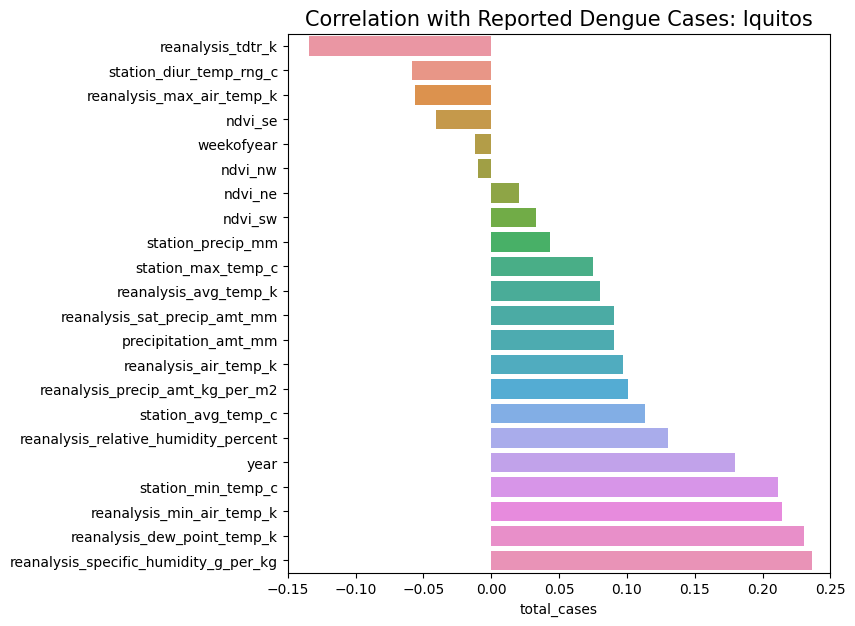

In [20]:
# df_features_train['total_cases'] = rawlabels.total_cases
sjcorr = (df_train_with_label[df_train_with_label['city']=='sj']
          .corr(numeric_only=True)
          .total_cases
          .drop(['total_cases'], axis=0)
          .sort_values())
iqcorr = (df_train_with_label[df_train_with_label['city']=='iq']
          .corr(numeric_only=True)
          .total_cases
          .drop(['total_cases'], axis=0)
          .sort_values())

plt.figure(figsize=[7,7])
plt.title('Correlation with Reported Dengue Cases: San Juan', size=15)
sns.barplot(x=sjcorr, y=sjcorr.index,)
plt.xlim([-.15, .25])
plt.show()
plt.figure(figsize=[7,7])
plt.title('Correlation with Reported Dengue Cases: Iquitos', size=15)
sns.barplot(x=iqcorr, y=iqcorr.index)
plt.xlim([-.15, .25])
plt.show()

None of the original features have strong pearson correlations with the total cases target variable, but of course that says nothing about a time-series relationship.

Only temp has more impact, worth to anaylsis.

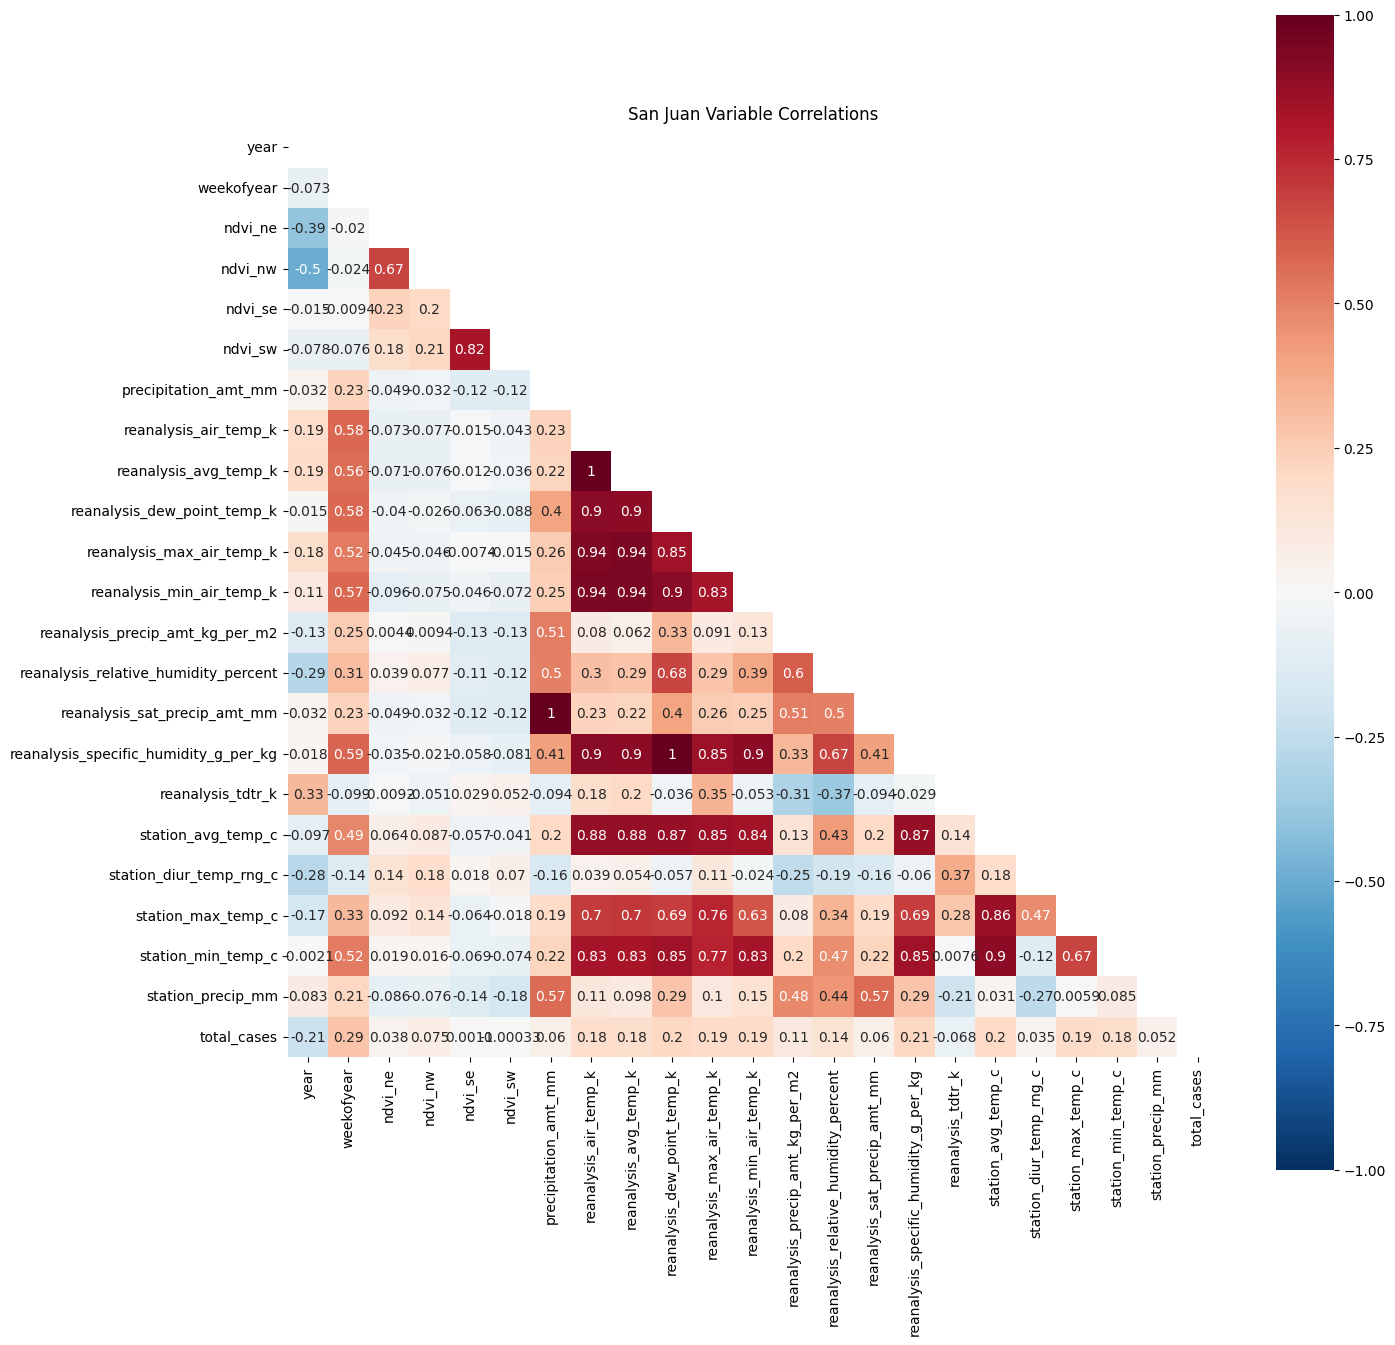

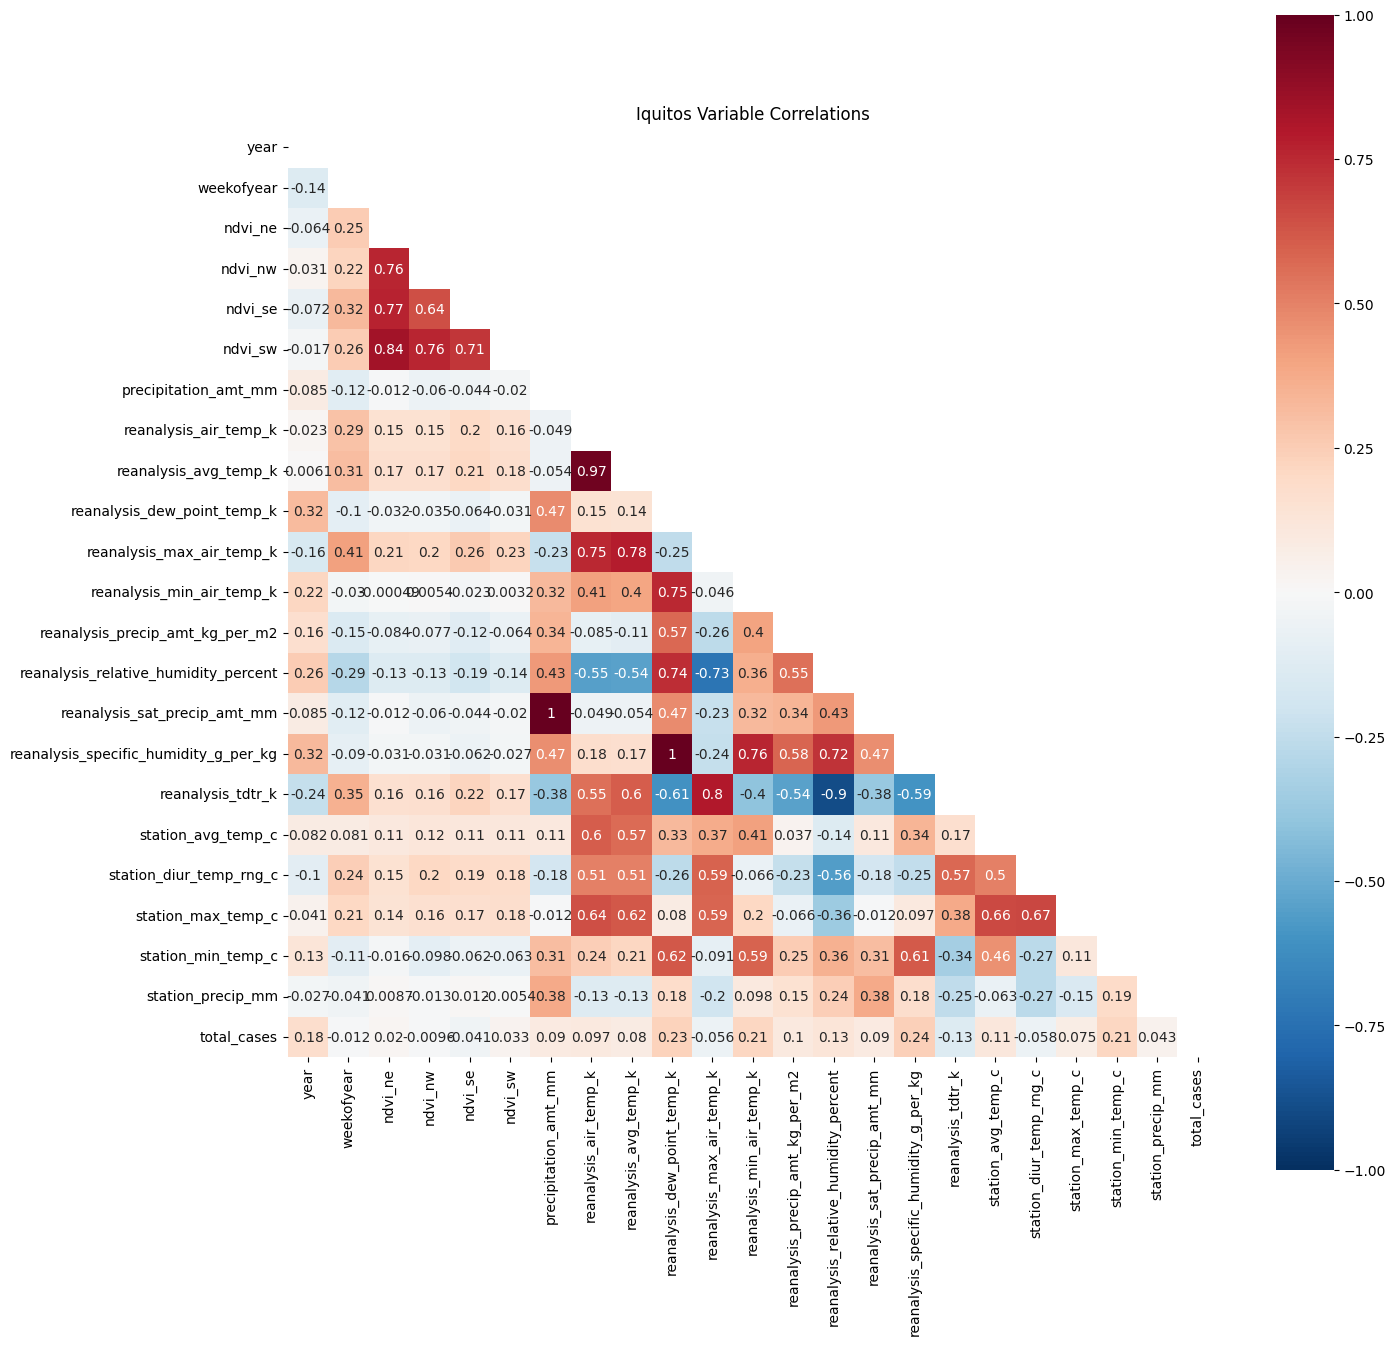

In [21]:
# compute the correlations
sj_correlations = df_train_with_label[df_train_with_label.city =='sj'].corr(numeric_only=True)
iq_correlations = df_train_with_label[df_train_with_label.city =='iq'].corr(numeric_only=True)
# plot san juan
plt.figure(figsize=[15,15])
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(sj_correlations, dtype=bool))
sj_corr_heat = sns.heatmap(sj_correlations, annot=True, mask=mask,
                square=True, vmin=-1, vmax=1, 
                center=0, cmap='RdBu_r')
plt.title('San Juan Variable Correlations', size=12)
plt.show()

# plot iquitos
plt.figure(figsize=[15,15])
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(iq_correlations, dtype=bool))
iq_corr_heat = sns.heatmap(iq_correlations, annot=True, mask=mask,
                square=True, vmin=-1, vmax=1, 
                center=0, cmap='RdBu_r')
plt.title('Iquitos Variable Correlations', size=12)
plt.show()

---

## Single Features Analysis

If we look at the training dataset it has multiple features:

#### City and date indicators:
- city — City abbreviations: sj for San Juan and iq for Iquitos
- week_start_date — Date given in yyyy-mm-dd format

#### NOAA’s GHCN daily climate data weather station measurements:
- station_max_temp_c — Maximum temperature
- station_min_temp_c — Minimum temperature
- station_avg_temp_c — Average temperature
- station_precip_mm — Total precipitation
- station_diur_temp_rng_c — Diurnal temperature range

#### PERSIANN satellite precipitation measurements (0.25x0.25 degree scale):
- precipitation_amt_mm — Total precipitation

#### NOAA’s NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale):
- reanalysis_sat_precip_amt_mm — Total precipitation
- reanalysis_dew_point_temp_k — Mean dew point temperature
- reanalysis_air_temp_k — Mean air temperature
- reanalysis_relative_humidity_percent — Mean relative humidity
- reanalysis_specific_humidity_g_per_kg — Mean specific humidity
- reanalysis_precip_amt_kg_per_m2 — Total precipitation
- reanalysis_max_air_temp_k — Maximum air temperature
- reanalysis_min_air_temp_k — Minimum air temperature
- reanalysis_avg_temp_k — Average air temperature
- reanalysis_tdtr_k — Diurnal temperature range

#### Satellite vegetation — Normalized difference vegetation index (NDVI) — NOAA’s CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements:
- ndvi_se — Pixel southeast of city centroid
- ndvi_sw — Pixel southwest of city centroid
- ndvi_ne — Pixel northeast of city centroid
- ndvi_nw — Pixel northwest of city centroid

#### Additionally, we have information about the number of total_cases each week.

### Temperature: NOAA GHCN daily climate data

In some cases, the training data has outlier values that are not observed in the test data. Removing or shifting these may be something to explore

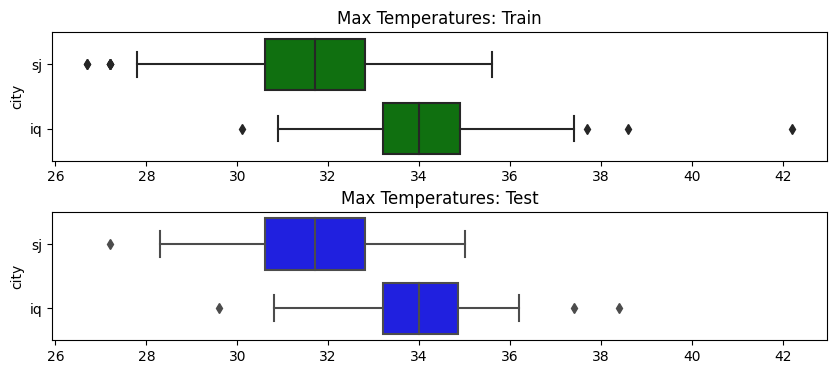

In [22]:
#MAX TEMPERATURES
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_max_temp_c', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('Max Temperatures: Train')

ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x='station_max_temp_c', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.title('Max Temperatures: Test')
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

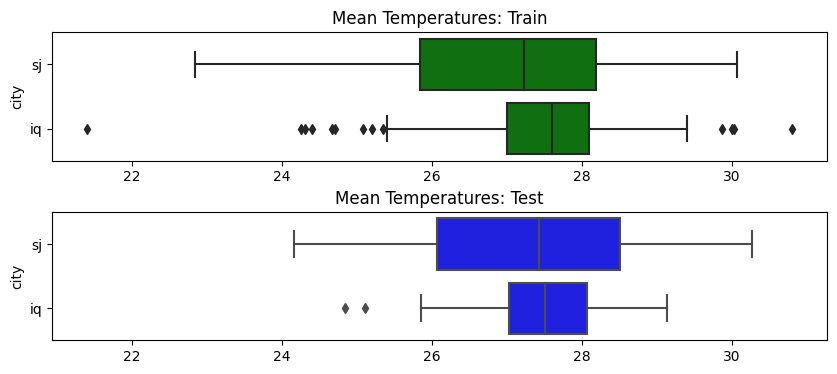

In [23]:
#MEAN TEMPERATURES
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_avg_temp_c', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('Mean Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x='station_avg_temp_c', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.title('Mean Temperatures: Test')
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

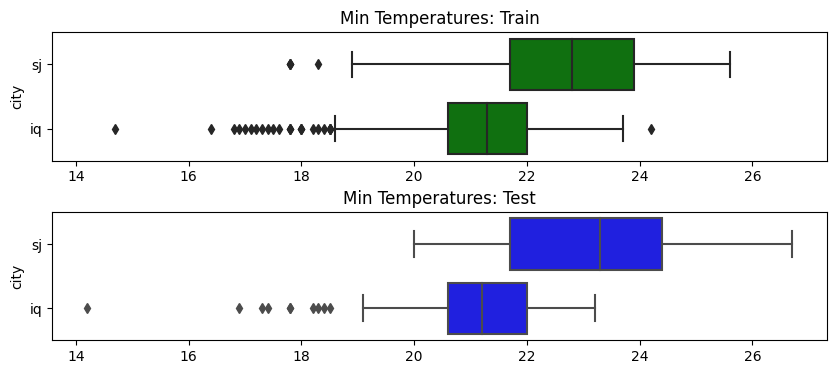

In [24]:
#MIN TEMPERATURES
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_min_temp_c', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('Min Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Min Temperatures: Test')
sns.boxplot(x='station_min_temp_c', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

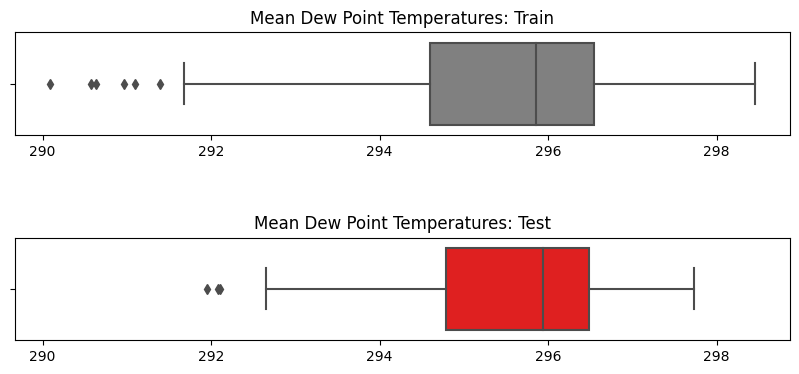

In [25]:
#Dew Point Temperatures
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(211)
sns.boxplot(x='reanalysis_dew_point_temp_k', 
            color='grey', data=df_features_train[df_features_train.city == 'iq'], ax=ax1)
plt.xlabel('')
plt.title('Mean Dew Point Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Mean Dew Point Temperatures: Test')
sns.boxplot(x='reanalysis_dew_point_temp_k', 
            color='red', data=df_features_test[df_features_test.city == 'iq'], ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=1)
plt.show()

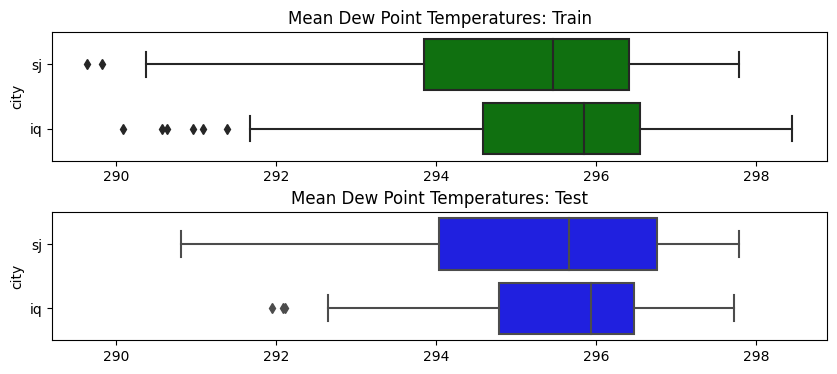

In [26]:
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(211)
sns.boxplot(x='reanalysis_dew_point_temp_k', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('Mean Dew Point Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Mean Dew Point Temperatures: Test')
sns.boxplot(x='reanalysis_dew_point_temp_k', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

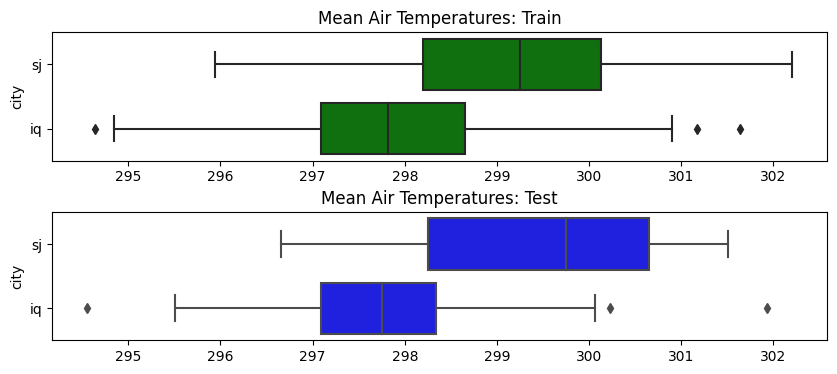

In [27]:
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(211)
sns.boxplot(x='reanalysis_air_temp_k', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('Mean Air Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Mean Air Temperatures: Test')
sns.boxplot(x='reanalysis_air_temp_k', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

### Variable seasonality

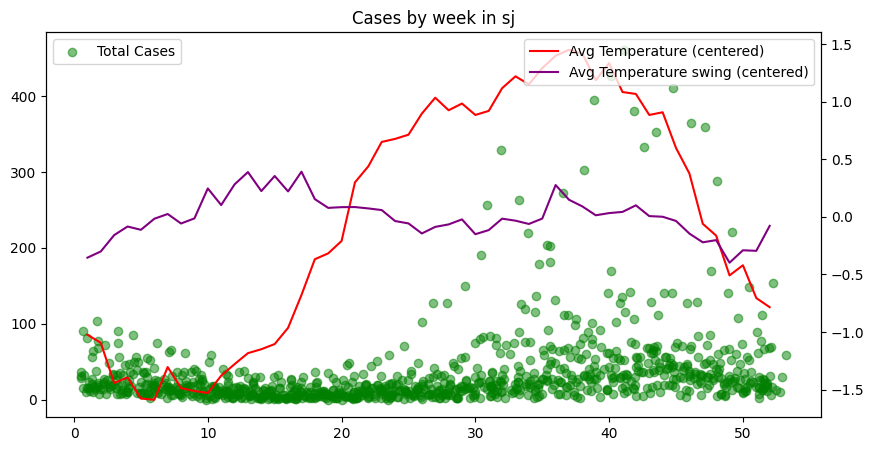

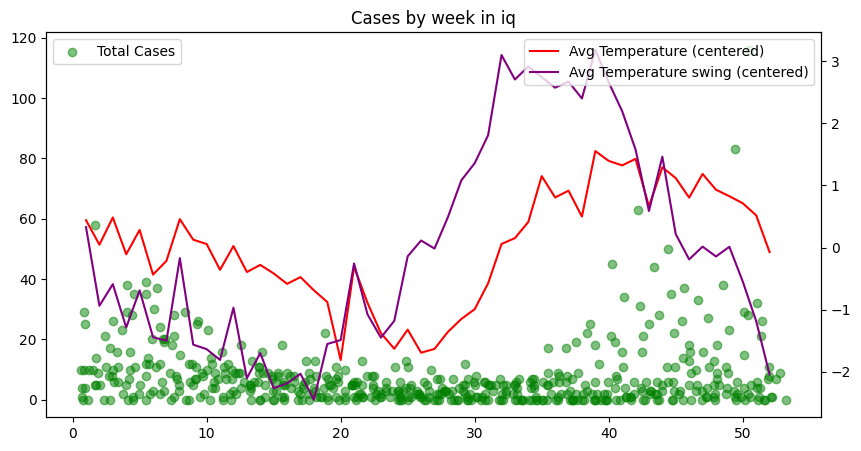

In [28]:
v = 'total_cases'
v2 = 'reanalysis_avg_temp_k'
v3 = 'reanalysis_tdtr_k'
c = 'sj'


fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Cases by week in {}'.format(c))
ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_train_with_label[df_train_with_label.city==c][v], 
            alpha=.5, color='green', label='Total Cases')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v2].mean() - 
             df_features_train[df_features_train.city==c][v2].mean(),
        label='Avg Temperature (centered)', color='red')
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v3].mean()- 
             df_features_train[df_features_train.city==c][v3].mean(),
          label='Avg Temperature swing (centered)', color='purple')
ax2.legend(loc=1)
plt.show()

c='iq'
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Cases by week in {}'.format(c))
ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_train_with_label[df_train_with_label.city==c][v], 
            alpha=.5, color='green', label='Total Cases')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v2].mean() - 
             df_features_train[df_features_train.city==c][v2].mean(),
        label='Avg Temperature (centered)', color='red')
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v3].mean()- 
             df_features_train[df_features_train.city==c][v3].mean(),
          label='Avg Temperature swing (centered)', color='purple')
ax2.legend(loc=1)
plt.show()

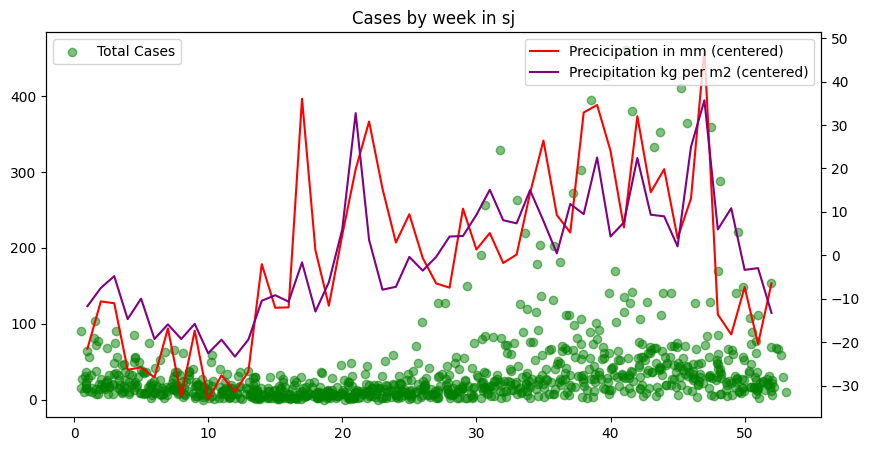

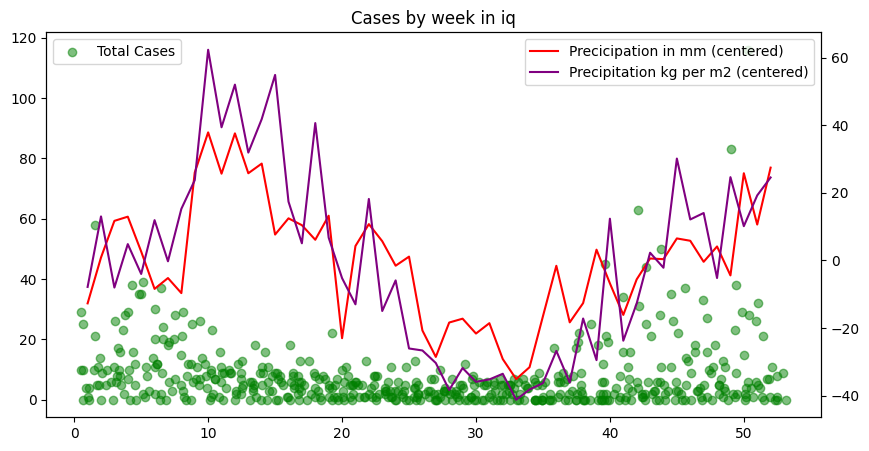

In [29]:
v = 'total_cases'
v2 = 'precipitation_amt_mm'
v3 = 'reanalysis_precip_amt_kg_per_m2'
c = 'sj'


fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Cases by week in {}'.format(c))
ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_train_with_label[df_train_with_label.city==c][v], 
            alpha=.5, color='green', label='Total Cases')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v2].mean() - 
             df_features_train[df_features_train.city==c][v2].mean(),
        label='Precicipation in mm (centered)', color='red')
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v3].mean()- 
             df_features_train[df_features_train.city==c][v3].mean(),
          label='Precipitation kg per m2 (centered)', color='purple')
ax2.legend(loc=1)
plt.show()

c='iq'
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Cases by week in {}'.format(c))
ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_train_with_label[df_train_with_label.city==c][v], 
            alpha=.5, color='green', label='Total Cases')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v2].mean() - 
             df_features_train[df_features_train.city==c][v2].mean(),
        label='Precicipation in mm (centered)', color='red')
ax2.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v3].mean()- 
             df_features_train[df_features_train.city==c][v3].mean(),
          label='Precipitation kg per m2 (centered)', color='purple')
ax2.legend(loc=1)
plt.show()

Each city has a temperature cycle that could perhaps be engineered into a seasonal feature

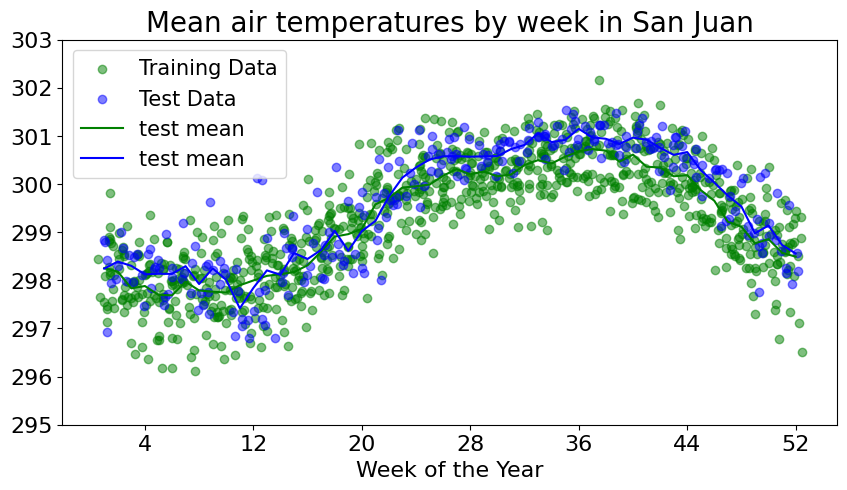

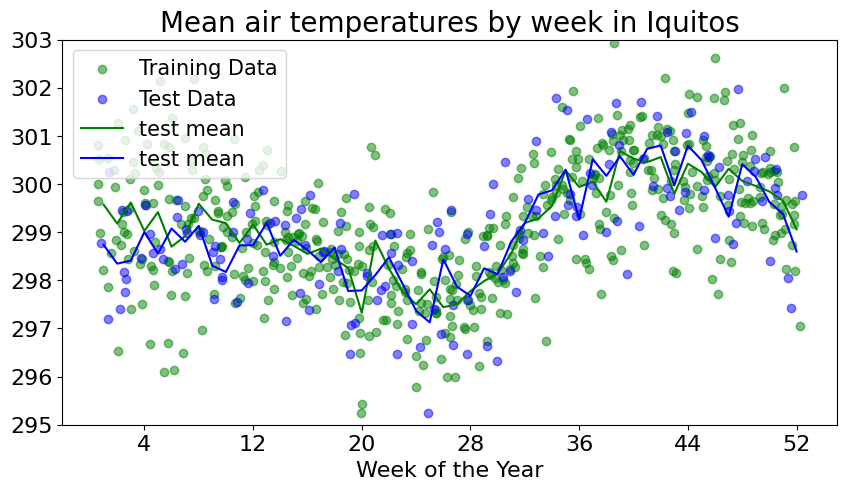

In [30]:
v = 'reanalysis_avg_temp_k'
c = 'sj'

plt.figure(figsize=[10,5])
plt.title('Mean air temperatures by week in San Juan', size=20)
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(df_features_test[df_features_test.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend(loc=2, prop={'size':15})
plt.xticks([4,12,20,28,36,44,52], size=16)
plt.yticks(size=16)
plt.ylim([295,303])
plt.xlabel('Week of the Year', size=16)
plt.show()

c='iq'
plt.figure(figsize=[10,5])
plt.title('Mean air temperatures by week in Iquitos', size=20)
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(df_features_test[df_features_test.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend(loc=2, prop={'size':15})
plt.xticks([4,12,20,28,36,44,52], size=16)
plt.yticks(size=16)
plt.ylim([295,303])
plt.xlabel('Week of the Year', size=16)
plt.show()

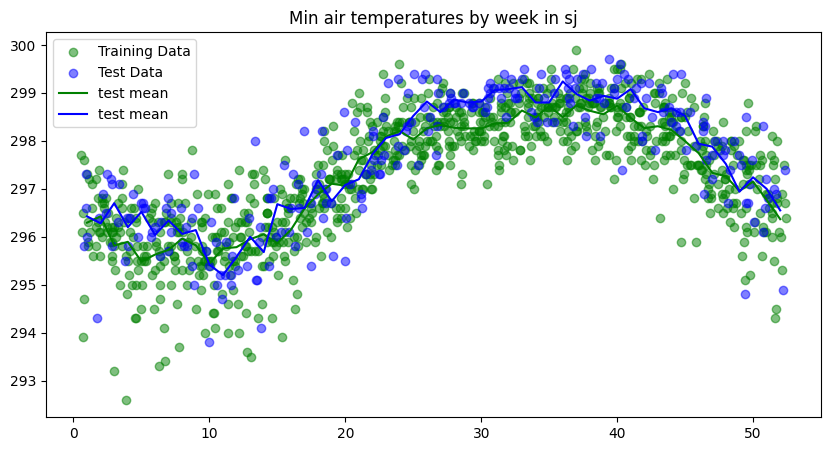

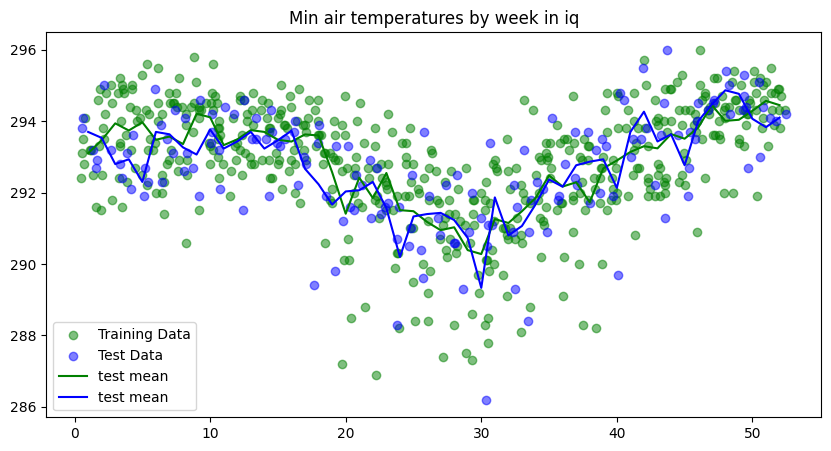

In [31]:
v = 'reanalysis_min_air_temp_k'
c = 'sj'

plt.figure(figsize=[10,5])
plt.title('Min air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(df_features_test[df_features_test.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[10,5])
plt.title('Min air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(df_features_test[df_features_test.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

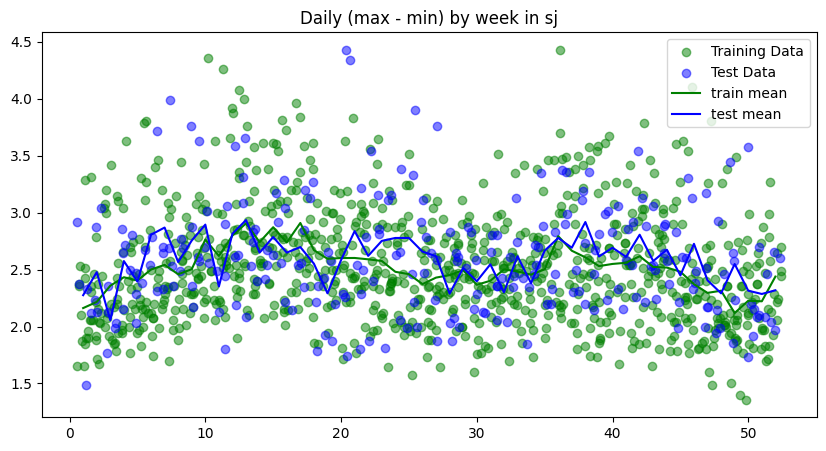

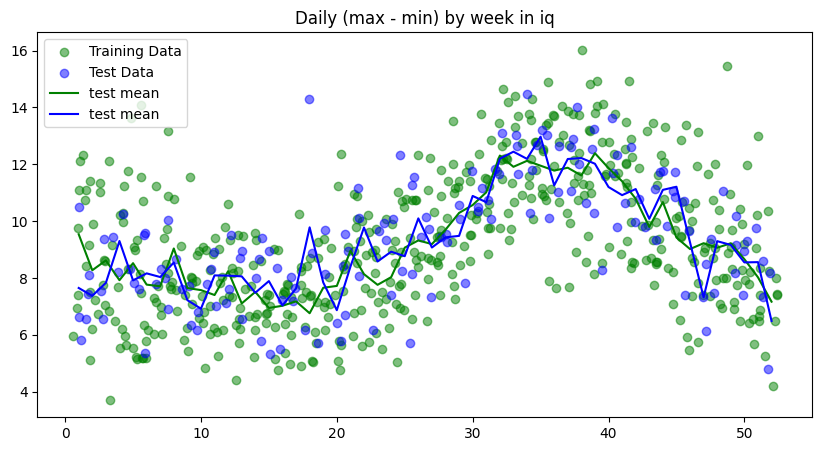

In [32]:
v = 'reanalysis_tdtr_k'
c = 'sj'

plt.figure(figsize=[10,5])
plt.title('Daily (max - min) by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v].mean(),
        label='train mean', color='green')
plt.plot(df_features_test[df_features_test.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[10,5])
plt.title('Daily (max - min) by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(df_features_train[df_features_train.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(df_features_test[df_features_test.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

## Rain
Again, we see some training outliers in each city that may be worth capping or removing

### Rain: PERSIANN Satellite at a .25x.25 degree scale

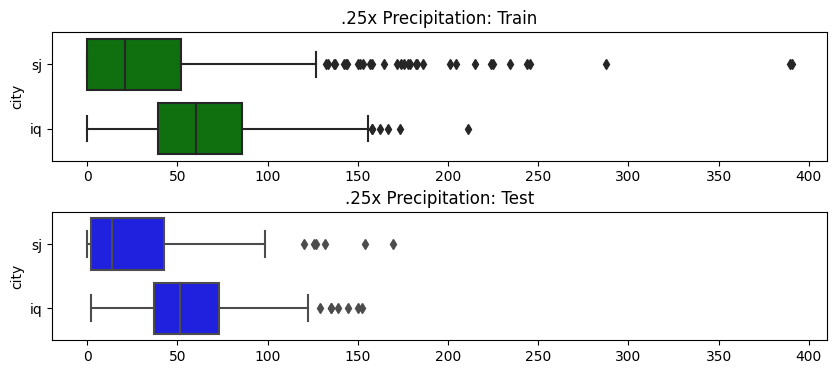

In [33]:
#Rain
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(211)
sns.boxplot(x='precipitation_amt_mm', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('.25x Precipitation: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('.25x Precipitation: Test')
sns.boxplot(x='precipitation_amt_mm', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

### Rain: NOAA's NCEP Climate Forecast System REanalysis at a .5x.5 degree scale

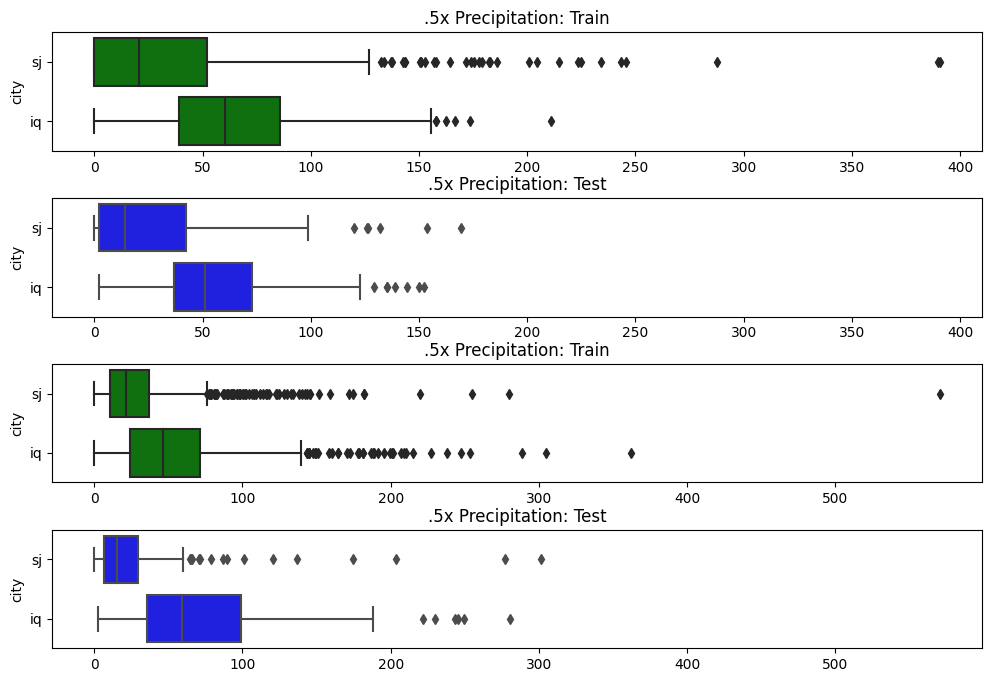

In [34]:
#Rain
fig = plt.figure(figsize=[12,8])
ax1 = plt.subplot(411)
sns.boxplot(x='reanalysis_sat_precip_amt_mm', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('.5x Precipitation: Train')
ax2 = plt.subplot(412, sharex=ax1)
plt.title('.5x Precipitation: Test')
sns.boxplot(x='reanalysis_sat_precip_amt_mm', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)

ax3 = plt.subplot(413)
sns.boxplot(x='reanalysis_precip_amt_kg_per_m2', y='city',
            color='green', data=df_features_train, ax=ax3)
plt.xlabel('')
plt.title('.5x Precipitation: Train')

ax4 = plt.subplot(414, sharex=ax3)
plt.title('.5x Precipitation: Test')
sns.boxplot(x='reanalysis_precip_amt_kg_per_m2', y='city',
            color='blue', data=df_features_test, ax=ax4)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

## Humidity: NOAA's NCEP Climate Forecast System Reanalysis

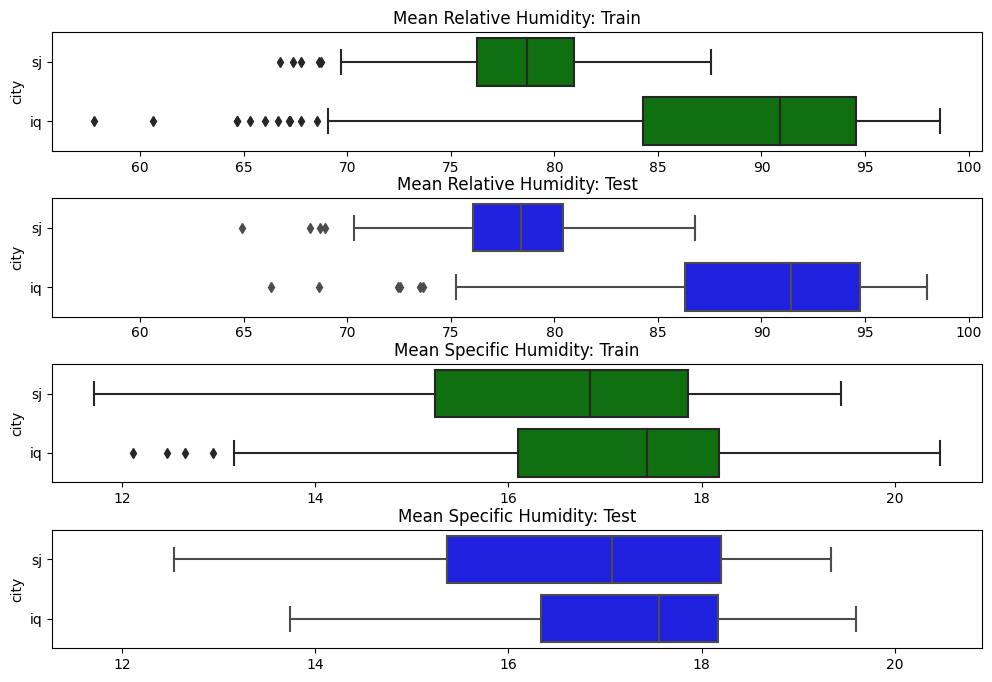

In [35]:
fig = plt.figure(figsize=[12,8])
ax1 = plt.subplot(411)
sns.boxplot(x='reanalysis_relative_humidity_percent', y='city',
            color='green', data=df_features_train, ax=ax1)
plt.xlabel('')
plt.title('Mean Relative Humidity: Train')
ax2 = plt.subplot(412, sharex=ax1)
plt.title('Mean Relative Humidity: Test')
sns.boxplot(x='reanalysis_relative_humidity_percent', y='city',
            color='blue', data=df_features_test, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)

ax3 = plt.subplot(413)
sns.boxplot(x='reanalysis_specific_humidity_g_per_kg', y='city',
            color='green', data=df_features_train, ax=ax3)
plt.xlabel('')
plt.title('Mean Specific Humidity: Train')

ax4 = plt.subplot(414, sharex=ax3)
plt.title('Mean Specific Humidity: Test')
sns.boxplot(x='reanalysis_specific_humidity_g_per_kg', y='city',
            color='blue', data=df_features_test, ax=ax4)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

## Vegetation Index
SJ seems relatively stable whereas IQ has some slight vegetation seasonality

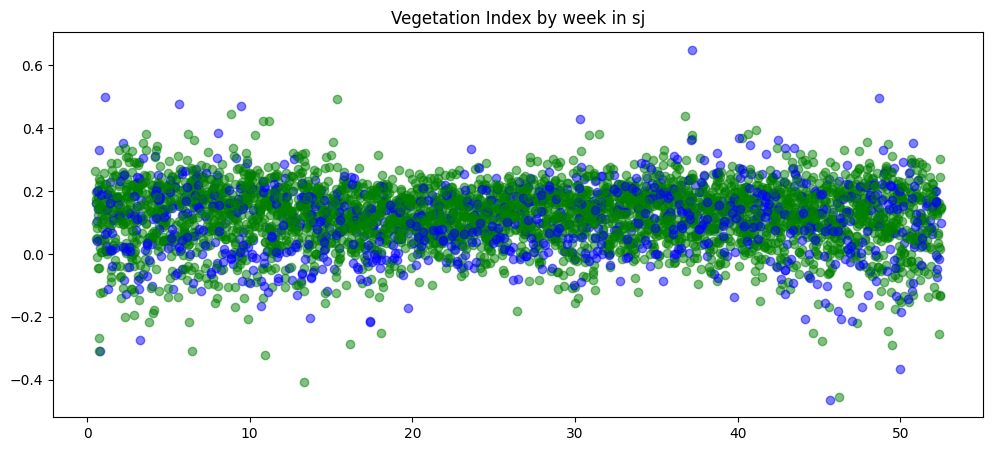

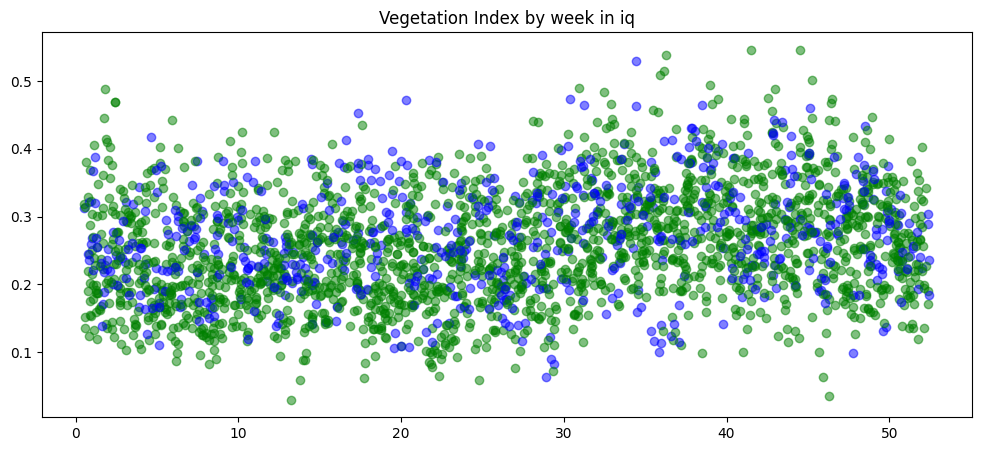

In [36]:
v = ['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']
c = 'sj'

plt.figure(figsize=[12,5])
plt.title('Vegetation Index by week in {}'.format(c))
for pixel in v:
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][pixel], 
            alpha=.5, color='green', label='Training Data')
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][pixel], 
            alpha=.5, color='blue', label='Test Data')
plt.show()

c='iq'
plt.figure(figsize=[12,5])
plt.title('Vegetation Index by week in {}'.format(c))
for pixel in v:
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_train[df_features_train.city==c].weekofyear],
            y=df_features_train[df_features_train.city==c][pixel], 
            alpha=.5, color='green', label='Training Data')
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               df_features_test[df_features_test.city==c].weekofyear],
            y=df_features_test[df_features_test.city==c][pixel], 
            alpha=.5, color='blue', label='Test Data')
plt.show()